**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_path = '/content/drive/MyDrive/YourFolderName/'

train_path = os.path.join(base_path, 'input.csv')
test_path = os.path.join(base_path, 'input_test.csv')
label_train_path = os.path.join(base_path, 'labels.csv')
label_test_path = os.path.join(base_path, 'labels_test.csv')

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Dataset/input.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Dataset/input_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Dataset/labels.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Dataset/labels_test.csv')


In [ ]:
print("✅ Files loaded successfully!")
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

**Prepare data**

In [ ]:
# Convert to numpy arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
print("Training data shape:", X_train.shape)

In [ ]:
num_features = X_train.shape[1]
print(f"Number of features (pixels per image): {num_features}")

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

In [ ]:
# Correct image dimensions
img_rows, img_cols, channels = 100, 100, 3  # 100x100 RGB

# Reshape
X_train = X_train.reshape(-1, img_rows, img_cols, channels)
X_test = X_test.reshape(-1, img_rows, img_cols, channels)

In [ ]:
print("After reshaping:", X_train.shape, X_test.shape)

In [ ]:
# 🎯 Encode Labels
# =============================
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Number of classes:", y_train.shape[1])

**Build CNN Model**

In [ ]:
# ⚙️ Define CNN Architecture
# =============================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

**Train the Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,           # you can increase this
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

In [ ]:
# 📈 Model Evaluation
# =============================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred_classes))
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred_classes))

**Visualize Accuracy & Loss**

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=100,
    verbose=1
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 353ms/step - accuracy: 0.7571 - loss: 0.4847 - val_accuracy: 0.7494 - val_loss: 0.4892
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 343ms/step - accuracy: 0.7691 - loss: 0.4815 - val_accuracy: 0.7870 - val_loss: 0.4727
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.7810 - loss: 0.4587 - val_accuracy: 0.7544 - val_loss: 0.5037
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 344ms/step - accuracy: 0.7786 - loss: 0.4763 - val_accuracy: 0.7619 - val_loss: 0.4920
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 341ms/step - accuracy: 0.7965 - loss: 0.4646 - val_accuracy: 0.7970 - val_loss: 0.4625
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.7754 - loss: 0.4553 - val_accuracy: 0.7694 - val_loss: 0.4969
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step - accuracy: 0.7897 - loss: 0.4461 - val_accuracy: 0.7093 - val_loss: 0.5682
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.7812 - loss: 0.4660 - 

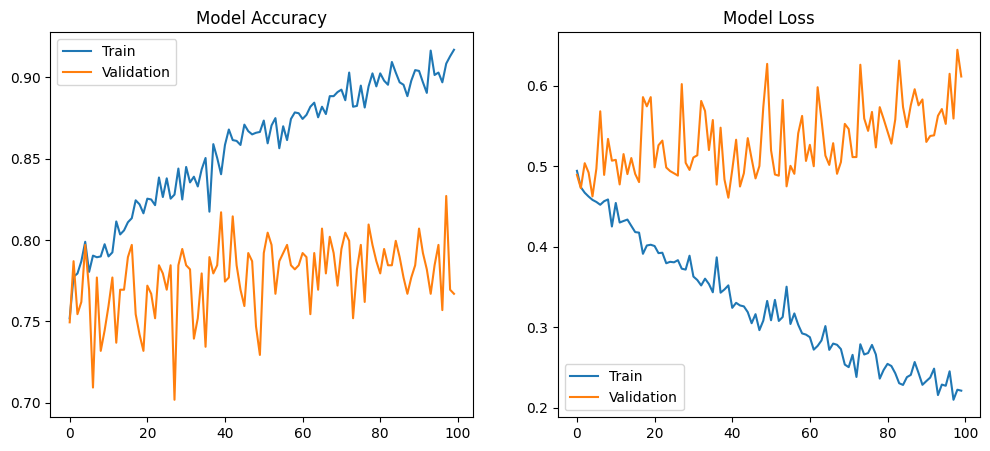

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
# 📈 Model Evaluation
# =============================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred_classes))
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred_classes))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       199
           1       0.82      0.69      0.75       200

    accuracy                           0.77       399
   macro avg       0.77      0.77      0.77       399
weighted avg       0.77      0.77      0.77       399

✅ Test Accuracy: 0.7669172932330827


Performance Summary
Metric	Value
Accuracy	76.7%
Precision (class 1)	0.82
Recall (class 1)	0.69
Precision (class 0)	0.73
Recall (class 0)	0.85
Dataset size	399 test images

✅ What this tells us:

The model is balanced overall (no strong bias toward either class).

Class 1 predictions are precise, but it’s missing some positives (recall=0.69).

Class 0 has slightly lower precision but better recall — i.e., the model is more conservative detecting class 1.